## Bài thi môn Trực quan hóa dữ liệu
email gửi file: vtran@utc.edu.vn <br/>
***Họ tên: Nguyễn Văn Hòa <br/>
MSV: 193012244 <br/>
Mã đề: 22TUD01***

In [40]:
from sklearn.datasets import load_breast_cancer

In [41]:
import numpy as np
import pandas as pd

In [42]:
x= load_breast_cancer().data

In [43]:
features = load_breast_cancer().feature_names

In [44]:
y = load_breast_cancer().target.reshape(-1,1)

In [45]:
df_data = np.hstack((x,y))
df = pd.DataFrame(data = df_data, columns = features.tolist()+['BreastCancerCategory'])

In [46]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,BreastCancerCategory
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


### Câu 1: Chọn 1 thuộc tính trong số các thuộc tính và vẽ biểu đồ tần số tương ứng

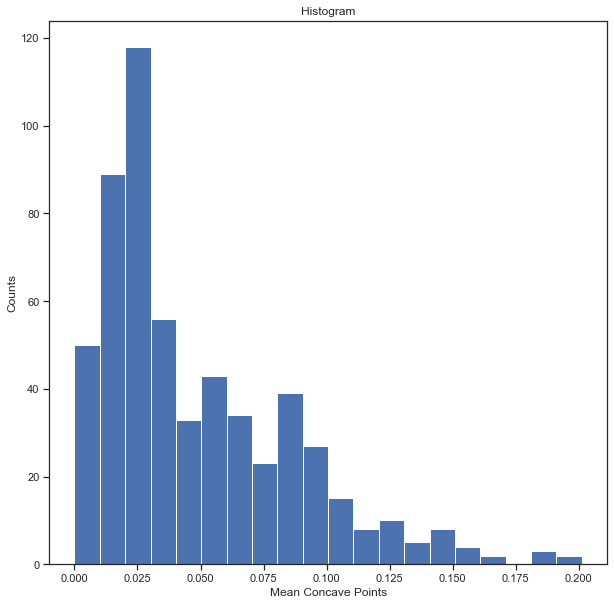

In [47]:
#Câu 1
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.hist(df['mean concave points'], bins = 20)
# Khai báo tiêu đề cho trục x
plt.title('Histogram')
plt.xlabel('Mean Concave Points')
# Khai báo tiêu đề cho trục y
plt.ylabel('Counts')
plt.show()

### Câu 2: Chọn 2 thuộc tính trong số các thuộc tính và vẽ biểu đồ scatter tương ứng

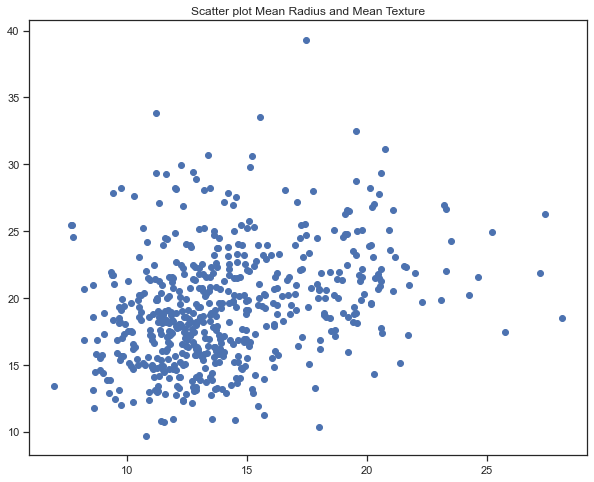

In [48]:
#Câu 2
fig = plt.figure(figsize=(10,8))
plt.scatter(df['mean radius'],df['mean texture'])
plt.title('Scatter plot Mean Radius and Mean Texture')
plt.show()

### Câu 3: Vẽ biểu đồ scatter plot matrix biểu diễn dữ liệu

Text(0.5, 0.98, 'Scatter Plot Matrix')

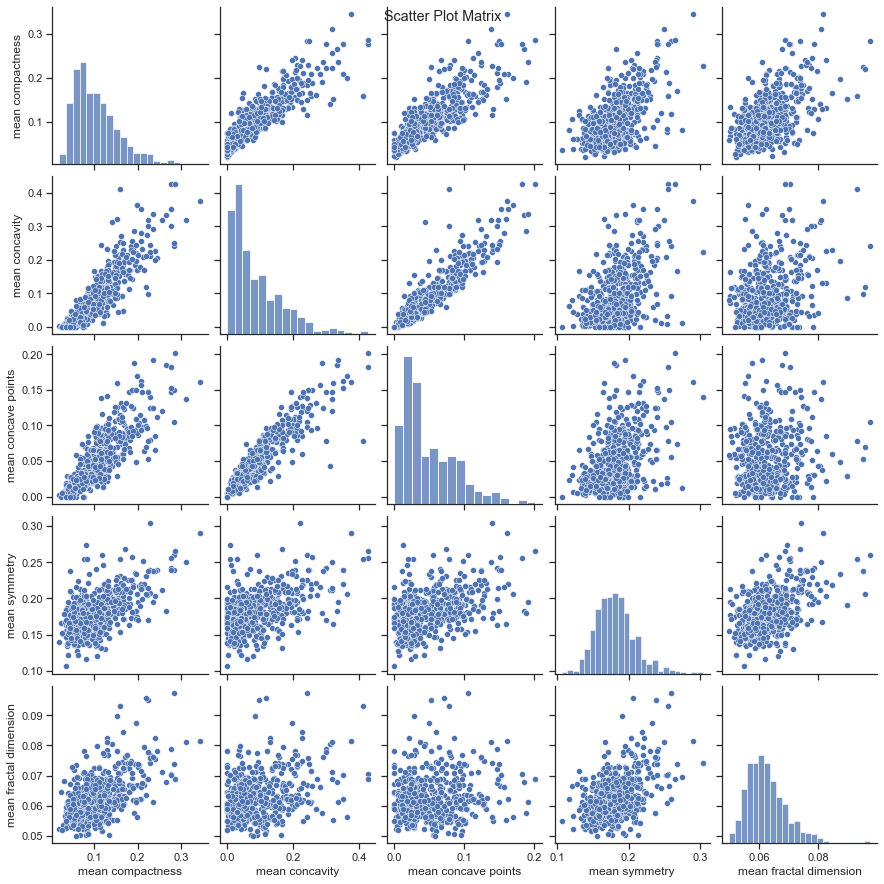

In [62]:
#Câu 3
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df[df.columns[5:10].tolist()]).fig.suptitle('Scatter Plot Matrix')

### Câu 4: Sử dụng thư viện Bokeh, thiết kế mô hình tương tác để lựa chọn các thuộc tính và vẽ biểu đồ scatter

In [50]:
#Câu 4
from bokeh.io import output_file,show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from ipywidgets import interact, interact_manual
from bokeh.plotting import figure, output_file,show,output_notebook
output_notebook()

Loading BokehJS ...

In [51]:
df['BreastCancerCategory'] = df.BreastCancerCategory.astype(str)
from bokeh.models import CategoricalColorMapper
mapper = CategoricalColorMapper(
        factors= ['0.0','1.0'],
        palette=['red','green'])

In [59]:
features = df.columns[:-1]
@interact(feature1=features,feature2=features)
def nvh(feature1,feature2):
    source = ColumnDataSource(df)
    p1 = figure( plot_width=500, plot_height=500)
    p1.circle(feature1,feature2,source= source,color={'field':'BreastCancerCategory','transform':mapper},
        legend_label='BreastCancerCategory') 
    layout= p1
    show(layout)

interactive(children=(Dropdown(description='feature1', options=('mean radius', 'mean texture', 'mean perimeter…

### Câu 5: Sử dụng phương pháp Star Coordinates để biểu diễn dữ liệu nhiều chiều

In [53]:
#Câu 5
from sklearn.preprocessing import MinMaxScaler
BreastCancer_Scaled = MinMaxScaler().fit_transform(df.drop(['BreastCancerCategory'],axis=1))

In [54]:
X = BreastCancer_Scaled
n ,m = X.shape
V = np.zeros((m,2))

In [55]:
for i in range(len(V)):
    V[i][0]= np.cos((2*np.pi*(i))/m)
    V[i][1]= np.sin((2*np.pi*(i))/m)

In [56]:
Y = X.dot(V)

In [57]:
df['BreastCancerCategory'] = df.BreastCancerCategory.astype(str)
color= []
for label in df['BreastCancerCategory']:
    if label == '0.0':
        color.append('red')
    else:
        color.append('green')

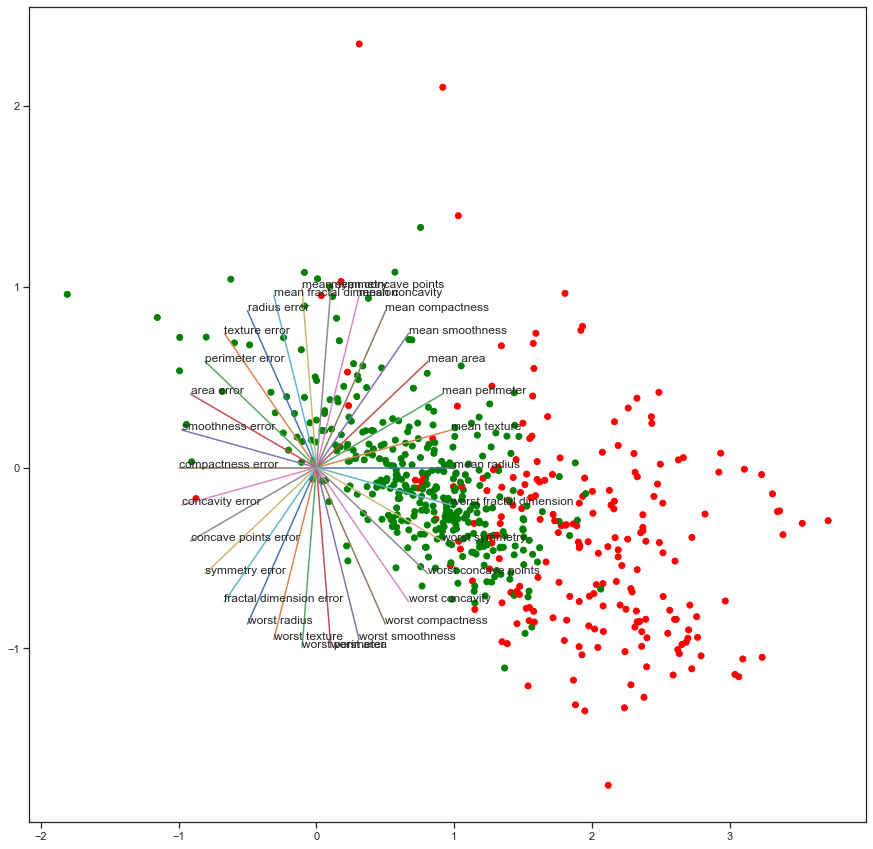

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,15))
plt.scatter(Y[:,0],Y[:,1],color=color)
texts= df.columns[:-1].tolist()
for i in range(len(V)):
    plt.plot([0,V[i][0]],[0,V[i][1]],'-')
    plt.text(V[i][0], V[i][1], texts[i],fontsize=12)
plt.show()